In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# random data with outliers
data = [105, 57, 54, 58, 56, 57, 59, 60, 58, 57, 56, 55, 100]

Method 1: Draw the data

outliers always stays in a random place or alone.

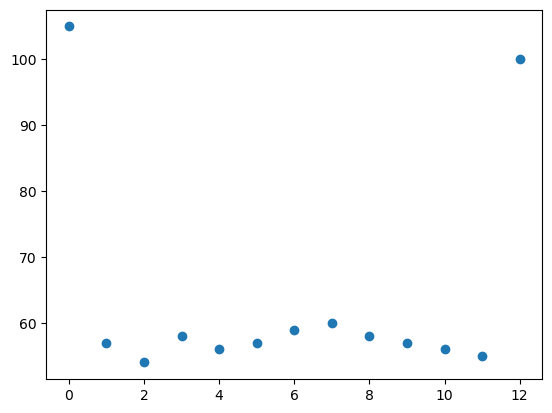

In [19]:
plt.scatter(range(len(data)),data)

<Axes: >

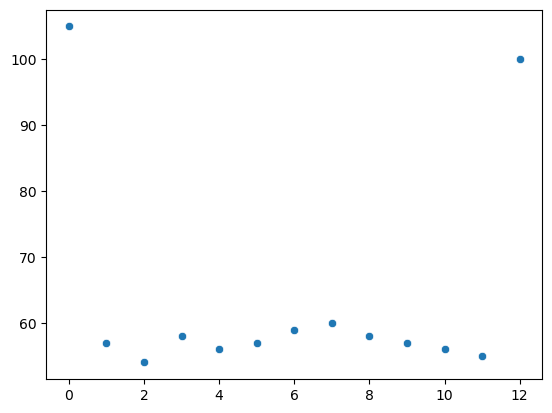

In [20]:
sns.scatterplot(x=range(len(data)), y=data)

Method 2: Sort the data

after sorting the outliers most of the time stay at the begining or ending 

In [27]:
sorted_data = sorted(data) # data.sort(), this method is in-place and does not return a new list
print(sorted_data)

[54, 55, 56, 56, 57, 57, 57, 58, 58, 59, 60, 100, 105]


Method 3: Z-Score

for more: https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-with-z-score/

In [36]:
threshold = 2 # threshold for outlier detection, let threshold is 2 for this case
mean = np.mean(sorted_data)
std_dev = np.std(sorted_data)
outliers = [x for x in sorted_data if (x < mean - threshold * std_dev) or (x > mean + threshold * std_dev)]
print(outliers)

[100, 105]


Method 4: IQR

In [37]:
min, q1, median, q3, max = np.percentile(sorted_data, [0, 25, 50, 75, 100])
min, q1, median, q3, max

(np.float64(54.0),
 np.float64(56.0),
 np.float64(57.0),
 np.float64(59.0),
 np.float64(105.0))

In [38]:
IQR = q3 - q1
IQR

np.float64(3.0)

In [39]:
lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR
lower_fence, upper_fence

(np.float64(51.5), np.float64(63.5))

In [40]:
# now identifying outliers
outliers = [x for x in sorted_data if (x < lower_fence) or (x > upper_fence)]
outliers

[100, 105]